#  Unsupervised Machine Learning
 is the process of teaching a computer to use unlabeled, unclassified data and enabling the algorithm to operate on that data without supervision. Without any previous data training, the machine’s job in this case is to organize unsorted data according to parallels, patterns, and variations.








# ***The Important Libararies***


---



In [2]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import joblib
import matplotlib.cm as cm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
import warnings
from sklearn.metrics import accuracy_score, classification_report
warnings.filterwarnings('ignore')
from sklearn.metrics import silhouette_score



---



---



---



# ***Read The Similarity Table Between All Users***


---



In [3]:
model_filename = 'drive/MyDrive/Dataset2/SimilarityOfUsers.csv'

Similarity_Users_Final = pd.read_csv(model_filename)

In [4]:
Similarity_Users_Final.head()

,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
0,1.000000,0.000592,0.070214,0.516196,0.265839,0.346080,0.540215,0.334737,0.041962,-0.000171,...,0.158338,0.480139,0.651735,0.139995,0.436931,0.390675,1.090690,1.393703,0.152265,0.410598
1,0.000592,1.000000,-0.000011,-0.000047,0.000179,0.000585,0.002136,0.000313,-0.000019,0.028983,...,0.391775,0.000179,-0.000162,-0.000029,-0.000008,0.008061,0.000086,0.024823,0.000393,0.264532
2,0.070214,-0.000011,1.000000,-0.000046,0.000020,-0.000418,-0.000033,0.000019,-0.000017,-0.000018,...,0.000006,-0.000021,0.017177,-0.000027,0.000033,-0.004172,0.004106,0.015269,-0.000015,0.021175
3,0.516196,-0.000047,-0.000046,1.000000,0.315915,0.255649,0.260805,0.116419,0.000039,0.033166,...,0.150155,0.369353,1.596355,0.068736,0.102317,0.885330,0.353090,0.472530,0.002325,0.193050
4,0.265839,0.000179,0.000020,0.315915,1.000000,1.197325,0.174704,1.300616,-0.000023,0.002595,...,0.017527,1.497260,0.337685,0.724984,0.238566,0.317725,0.361205,0.389136,0.526469,0.083756


In [5]:
# استخدم clip لتحديد القيم العليا (تكون أقل من أو تساوي 1.0) بقيمة 1.0
Similarity_Users_Final_Upper_1 = Similarity_Users_Final.clip(upper=1.0)
Similarity_Users_Final_Upper_1.head()

,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
0,1.000000,0.000592,0.070214,0.516196,0.265839,0.346080,0.540215,0.334737,0.041962,-0.000171,...,0.158338,0.480139,0.651735,0.139995,0.436931,0.390675,1.000000,1.000000,0.152265,0.410598
1,0.000592,1.000000,-0.000011,-0.000047,0.000179,0.000585,0.002136,0.000313,-0.000019,0.028983,...,0.391775,0.000179,-0.000162,-0.000029,-0.000008,0.008061,0.000086,0.024823,0.000393,0.264532
2,0.070214,-0.000011,1.000000,-0.000046,0.000020,-0.000418,-0.000033,0.000019,-0.000017,-0.000018,...,0.000006,-0.000021,0.017177,-0.000027,0.000033,-0.004172,0.004106,0.015269,-0.000015,0.021175
3,0.516196,-0.000047,-0.000046,1.000000,0.315915,0.255649,0.260805,0.116419,0.000039,0.033166,...,0.150155,0.369353,1.000000,0.068736,0.102317,0.885330,0.353090,0.472530,0.002325,0.193050
4,0.265839,0.000179,0.000020,0.315915,1.000000,1.000000,0.174704,1.000000,-0.000023,0.002595,...,0.017527,1.000000,0.337685,0.724984,0.238566,0.317725,0.361205,0.389136,0.526469,0.083756


In [6]:
transformed_similarity = Similarity_Users_Final_Upper_1.applymap(lambda x: max(0, x))
transformed_similarity.head()

,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
0,1.000000,0.000592,0.070214,0.516196,0.265839,0.346080,0.540215,0.334737,0.041962,0.000000,...,0.158338,0.480139,0.651735,0.139995,0.436931,0.390675,1.000000,1.000000,0.152265,0.410598
1,0.000592,1.000000,0.000000,0.000000,0.000179,0.000585,0.002136,0.000313,0.000000,0.028983,...,0.391775,0.000179,0.000000,0.000000,0.000000,0.008061,0.000086,0.024823,0.000393,0.264532
2,0.070214,0.000000,1.000000,0.000000,0.000020,0.000000,0.000000,0.000019,0.000000,0.000000,...,0.000006,0.000000,0.017177,0.000000,0.000033,0.000000,0.004106,0.015269,0.000000,0.021175
3,0.516196,0.000000,0.000000,1.000000,0.315915,0.255649,0.260805,0.116419,0.000039,0.033166,...,0.150155,0.369353,1.000000,0.068736,0.102317,0.885330,0.353090,0.472530,0.002325,0.193050
4,0.265839,0.000179,0.000020,0.315915,1.000000,1.000000,0.174704,1.000000,0.000000,0.002595,...,0.017527,1.000000,0.337685,0.724984,0.238566,0.317725,0.361205,0.389136,0.526469,0.083756


In [7]:
transformed_similarity2 = transformed_similarity.applymap(lambda x: x if x >= 0.4 else float(0.0))
transformed_similarity2.head()

,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
0,1.000000,0.0,0.0,0.516196,0.0,0.0,0.540215,0.0,0.0,0.0,...,0.0,0.480139,0.651735,0.000000,0.436931,0.00000,1.0,1.00000,0.000000,0.410598
1,0.000000,1.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.00000,0.000000,0.000000
2,0.000000,0.0,1.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.00000,0.000000,0.000000
3,0.516196,0.0,0.0,1.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,1.000000,0.000000,0.000000,0.88533,0.0,0.47253,0.000000,0.000000
4,0.000000,0.0,0.0,0.000000,1.0,1.0,0.000000,1.0,0.0,0.0,...,0.0,1.000000,0.000000,0.724984,0.000000,0.00000,0.0,0.00000,0.526469,0.000000




---



---



---



# ***K-Means Clustering:***


---

K-Means is an unsupervised machine learning algorithm used for clustering, a process of grouping similar data points together. The algorithm aims to partition a dataset into K distinct, non-overlapping subsets (clusters), where each data point belongs to the cluster with the nearest mean.

# ***How K-Means Works:***


---

1. `Initialization`: Choose the number of clusters (K) that you want to identify in the dataset.
Randomly initialize K centroids, which are the initial center points for each cluster.

2. `Assignment Step` : Assign each data point to the cluster whose centroid is closest. Typically, the distance metric used is Euclidean distance.

3. `Update Step` : Recalculate the centroids of each cluster based on the mean of all the data points assigned to that cluster.

4. `Repeat` : Repeat the Assignment and Update steps until convergence. Convergence occurs when the centroids no longer change significantly, or when a specified number of iterations is reached.



---



---



---



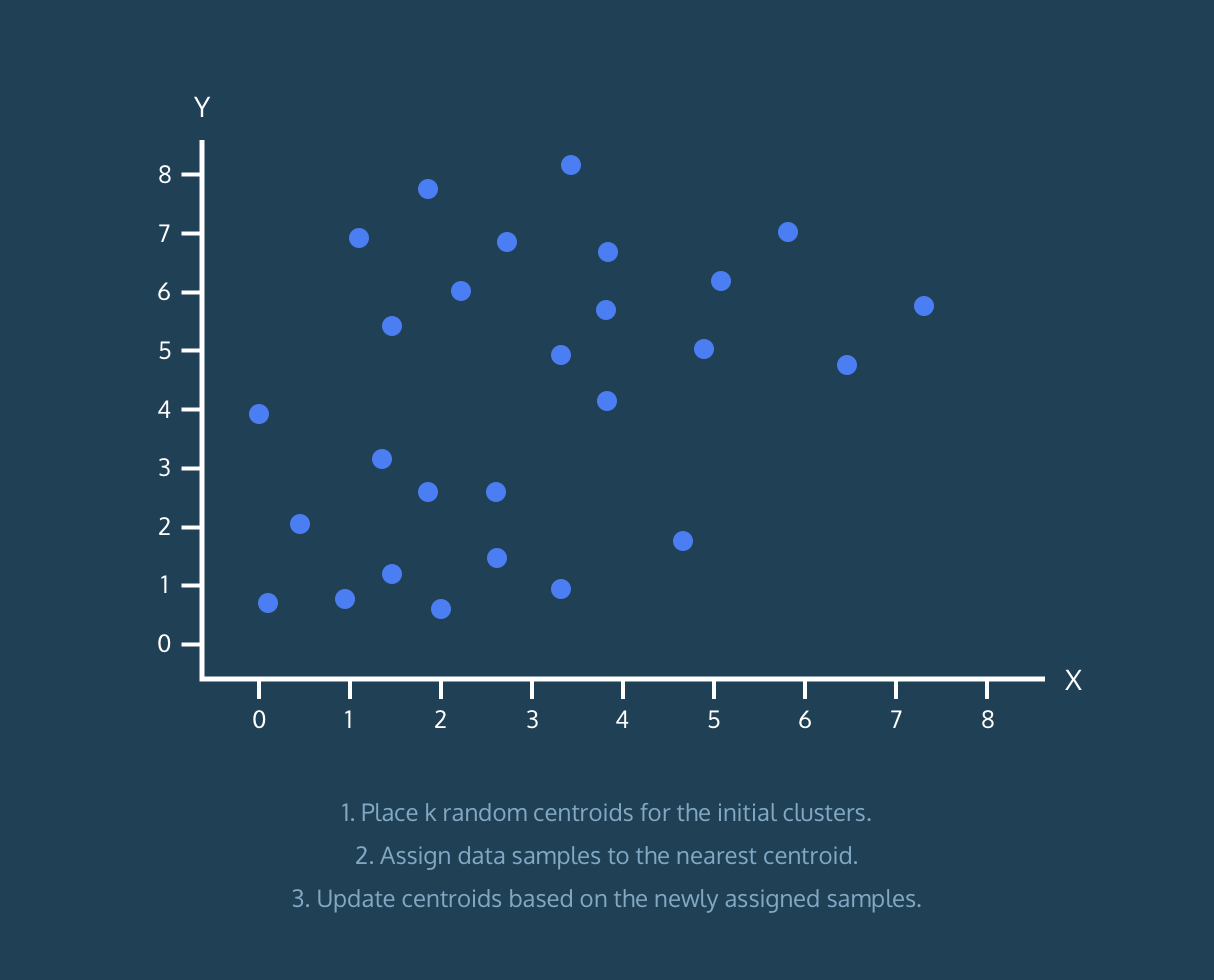

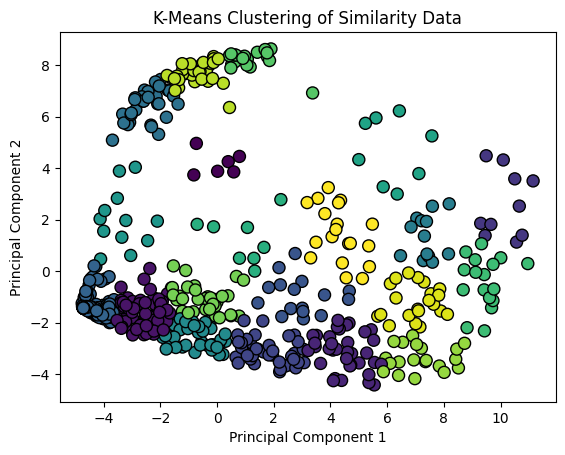

In [8]:
def kmeans_clustering_visualization(similarity_matrix, num_clusters, num_trials):
    silhouette_scores = []

    # Use PCA to reduce dimensions
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(similarity_matrix)

    for i in range(num_trials):
        # Using K-Means with different random initializations
        kmeans = KMeans(n_clusters=num_clusters, random_state=i)
        clusters = kmeans.fit_predict(reduced_data)

        # Calculate Silhouette Score for the current trial
        silhouette_avg = silhouette_score(reduced_data, clusters)
        silhouette_scores.append(silhouette_avg)

    # Choose the trial with the highest Silhouette Score
    best_trial_index = silhouette_scores.index(max(silhouette_scores))
    best_clusters = KMeans(n_clusters=num_clusters, random_state=best_trial_index).fit_predict(reduced_data)

    return reduced_data, best_clusters

def plot_clusters(reduced_data, clusters, cluster_spacing=0.1):
    plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters, cmap='viridis', edgecolors='k', s=75)
    plt.title('K-Means Clustering of Similarity Data')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()

# Example Usage:
# Assuming 'transformed_similarity' is your similarity matrix
reduced_data, clusters_ = kmeans_clustering_visualization(transformed_similarity2, num_clusters=20, num_trials=2000)
plot_clusters(reduced_data, clusters_)



---



---



---



# ***What is PCA ?***


---



✅**The code you provided uses Principal Regression Analysis (PCA) technique for dimensionality reduction. Let's explain the lines in detail:**

1. `PCA` is an abbreviation for Principal Component Analysis, which is a technique used to analyze and improve retrospective data and reduce dimensionality.

2. `n_components=2`: Specifies the number of final dimensions to which the data should be reduced. In this context, it is set to 2, meaning that PCA will reduce the data to 2 dimensions.

3. `pca.fit_transform(similarity_matrix)`: Here the `fit_transform` function is used to train the PCA model on the `similarity_matrix` and transform the data to the new dimensions.

    - `fit_transform`: It defines the internal parameters of the model using the data used in training and transforms the data to the new dimensions.

    - `similarity_matrix`: assumed to be the similarity matrix, which contains information about the similarities or differences between the data.

    - `reduced_data`: is the final result of the PCA application, where the data after transformation is stored in this variable, which now has its dimensions reduced to 2.

In short, this code uses PCA to reduce the dimensionality of the similarity matrix `similarity_matrix` to 2 dimensions, and the result is stored in `reduced_data`.

# ***And What is The Silhouette Score value ?***


---



# **The Silhouette Score value indicates the quality of the clusters obtained using the K-Means algorithm. The value is between -1 and 1, where:**

- A value close to 1 indicates that the elements within the clusters are

homogeneous and well separated from the elements in other clusters.
- A value close to -1 indicates that there is a significant difference between the elements within the clusters and the elements in other clusters, and this can be considered an indicator of bad attraction for the clusters.
- A value close to 0 indicates overlap or confusion in the assembly.

In your case, the Silhouette Score is 0.382, which is a positive value that indicates that there is a good level of homogeneity within the clusters compared to separation between the clusters. This value can be considered positive and indicates good quality of the assemblies obtained.

In [9]:
from sklearn.metrics import silhouette_score

# Assuming reduced_data and clusters are obtained from your function
silhouette_avg = silhouette_score(reduced_data, clusters_)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.4814965476404745




---



---



---



# ***This Class Shows The Cluster To Which Each User Belongs, Out Of The 20 Clusters Based On Which I Divided The Data.***


---



In [26]:

clusters_dict = {}

for i, cluster in enumerate(clusters_+1):
    if cluster in clusters_dict:
       clusters_dict[cluster].append(i)
    else:
       clusters_dict[cluster] = [i]

df = pd.DataFrame(clusters_dict.items(), columns=['Cluster Number', 'Users'])
df.head(20)


,Cluster Number,Users
0,20,"[0, 18, 71, 81, 95, 111, 200, 201, 216, 229, 2..."
1,7,"[1, 2, 8, 11, 12, 35, 43, 47, 48, 52, 54, 59, ..."
2,16,"[3, 26, 50, 58, 68, 74, 99, 103, 123, 164, 233..."
3,8,"[4, 13, 25, 36, 39, 98, 106, 129, 133, 135, 14..."
4,18,"[5, 37, 42, 45, 53, 55, 80, 101, 120, 125, 132..."
5,3,"[6, 14, 15, 20, 40, 61, 75, 85, 104, 128, 136,..."
6,15,"[7, 57, 93, 108, 116, 178, 228, 234, 313, 346,..."
7,2,"[9, 19, 24, 28, 30, 46, 64, 69, 73, 78, 96, 97..."
8,1,"[10, 31, 83, 92, 436, 593]"
9,19,"[16, 65, 131, 176, 181, 197, 198, 199, 225, 25..."




---



---



---



# ***Number Of Users In Each Cluster***


---



In [11]:
from collections import Counter

# Count occurrences of each unique element
element_counts = Counter(clusters_+1)

# Convert to DataFrame
result_df = pd.DataFrame(element_counts.items(), columns=['Cluster No.', 'Similar Users Count'])

# Sort DataFrame by 'Cluster No.'
result_df = result_df.sort_values(by='Cluster No.')

# Display the DataFrame
result_df.head(20)


,Cluster No.,Similar Users Count
8,1,6
7,2,67
5,3,35
19,4,10
11,5,40
16,6,16
1,7,159
3,8,33
18,9,13
12,10,39


In [12]:
result_df.to_csv('ClustersUsers.csv', index=False)



---



---



---



# ***K-Nearest Neighbors (KNN)***


---



is a simple and intuitive machine learning algorithm used for both classification and regression tasks. It's a type of instance-based learning, where the algorithm memorizes the training dataset and makes predictions based on the similarity between new data points and the existing training data.

# ***Here's a step-by-step explanation of the KNN algorithm:***


---



1. `Input Data` : KNN requires a labeled dataset, meaning that each data point in the training set is associated with a class or target value.

2. `Choose the Number of Neighbors (K)` : The "K" in KNN represents the number of nearest neighbors to consider when making a prediction. You need to choose a suitable value for K. A smaller K makes the model more sensitive to noise, while a larger K makes it more resistant to outliers.

3. `Calculate Distance` : The algorithm measures the distance between the new data point and every point in the training set. Common distance metrics include Euclidean distance, Manhattan distance, and others, depending on the nature of the data.

4. `Find Nearest Neighbors` : Identify the K points in the training data that are closest to the new data point based on the chosen distance metric.

5. `Majority Voting (for Classification) or Weighted Average (for Regression)` : For classification tasks, the class label of the majority of the K neighbors is assigned to the new data point. In the case of regression, the algorithm calculates a weighted average of the target values of the K neighbors.

6. `Make Prediction` : Assign the predicted class label or regression value to the new data point.

KNN is a lazy learner because it doesn't learn a specific model during the training phase. Instead, it memorizes the entire training dataset and makes predictions at runtime. This makes it computationally expensive during prediction, especially with large datasets.

# ***Key considerations:***
---

1. `Feature scaling` : Standardizing or normalizing the features can be crucial, as KNN is sensitive to the scale of the input features.

2. `Choosing the right distance metric` : The choice of distance metric should align with the characteristics of the data.

3. `Handling ties` : In classification, if there's a tie among classes, you may need a tie-breaking mechanism.




KNN is easy to understand and implement, making it a good starting point for understanding the basics of supervised learning.

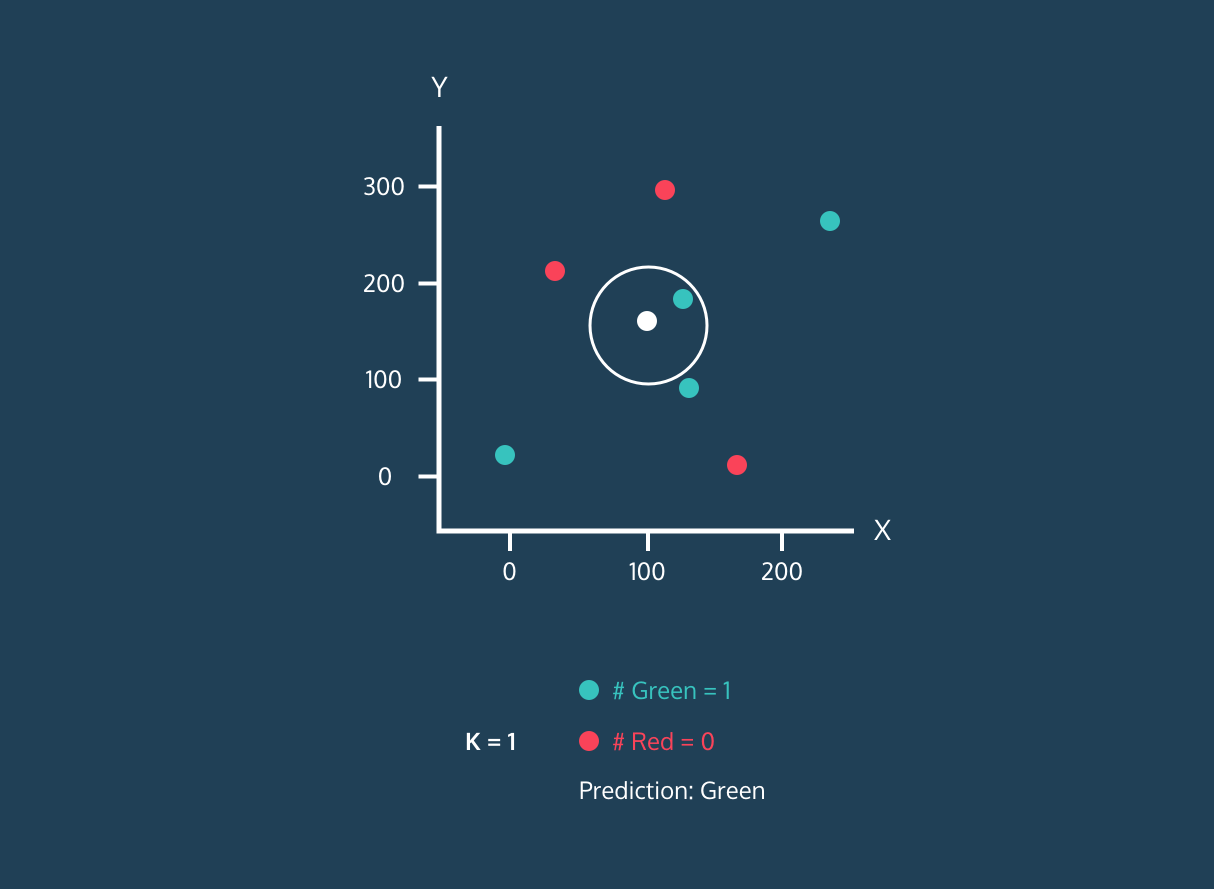

In [13]:
# Extract the clustering results to a DataFrame
kmeans_results_df = pd.DataFrame({'PC1': reduced_data[:, 0], 'PC2': reduced_data[:, 1], 'Cluster': clusters_})

from sklearn.model_selection import train_test_split

# Assuming 'kmeans_results_df' is your DataFrame with clustering results
X = kmeans_results_df[['PC1', 'PC2']]
y = kmeans_results_df['Cluster']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set up and train KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Make predictions on the training set
y_pred_train = knn.predict(X_train)

# Make predictions on the testing set
y_pred_test = knn.predict(X_test)

In [14]:
# Calculate accuracy on the training data
accuracy_train = accuracy_score(y_train, y_pred_train)
print(f'Training Accuracy: {accuracy_train}')

# Make predictions using KNN on the test data
y_pred_test = knn.predict(X_test)

# Calculate accuracy on the test data
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f'Test Accuracy: {accuracy_test}')


Training Accuracy: 0.9897540983606558
Test Accuracy: 0.9344262295081968


✅
# **The evaluation metrics provided (precision, recall, and F1-score) indicate the performance of a classification model. Here's a brief interpretation of these metrics:**

`Precision`: Precision is the ratio of true positive predictions to the total predicted positives. A high precision indicates that the model has a low false positive rate. In your case, precision values are generally high, ranging from 0.88 to 1.00, which is good.

`Recall (Sensitivity)`: Recall is the ratio of true positive predictions to the total actual positives. It is an indication of how well the model captures instances of the positive class. All recall values are generally high, ranging from 0.90 to 1.00, which is good.

`F1-score`: The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall. Like precision and recall, F1-score values are high, ranging from 0.93 to 1.00, which is good.

In summary, based on the provided metrics, your model seems to perform well across multiple classes. The high values of precision, recall, and F1-score suggest that the model is effective in classifying instances across different classes. However, it's always good to consider the specific context of your problem and the importance of each class when interpreting these results.



In [15]:
# Classification report on the test data
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.94      0.94      0.94        16
           2       1.00      0.86      0.92         7
           3       0.80      0.80      0.80         5
           4       0.88      0.88      0.88         8
           5       1.00      0.75      0.86         4
           6       1.00      1.00      1.00        24
           7       1.00      1.00      1.00         6
           8       1.00      1.00      1.00         2
           9       1.00      0.90      0.95        10
          12       0.50      1.00      0.67         1
          13       0.86      0.86      0.86         7
          14       1.00      1.00      1.00         3
          15       0.67      0.80      0.73         5
          16       1.00      1.00      1.00         7
          17       1.00      1.00      1.00         4
          18       0.86      1.00      0.92         6
          19       1.00    



---



---



---

